# Lab | Classification, Handling Imbalanced Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

## Round 1
- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.

In [2]:
df = pd.read_csv('Data/DATA_Customer-Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [5]:
df = df.fillna(0)

In [6]:
num_df = df.select_dtypes(include=['int64', 'float64'])
cat_df = df.select_dtypes(include=['object'])

In [7]:
cat_df = cat_df.drop(columns='Churn')

In [8]:
cat_df_dummified = pd.get_dummies(cat_df, drop_first=True)

In [9]:
X = pd.concat([num_df, cat_df_dummified], axis=1)

In [10]:
y = df.Churn

## Split the data into a training set and a test set.

In [11]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE) # splitting the data into train and test sets

## Scale the features either by using normalizer or a standard scaler.


In [13]:
scaler = StandardScaler() 

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

## Comparing 3 classification models BEFORE smote


In [14]:
model1 = DecisionTreeClassifier(max_depth=15)
model2 = KNeighborsClassifier(n_neighbors=5,weights='uniform')
model3 = LogisticRegression()

model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree', 'K Neighbors', 'Logistic Regression']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Decision Tree': 0.7387299626005317, 'K Neighbors': 0.764819913601397, 'Logistic Regression': 0.7976570564900607}


## Upsampling using SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [16]:
y_train.value_counts()

No     4159
Yes    1475
Name: Churn, dtype: int64

In [17]:
X_sm, y_sm = smote.fit_resample(X_train_scaled, y_train)
y_sm.value_counts()

Yes    4159
No     4159
Name: Churn, dtype: int64

## Comparing 3 classification models AFTER smote

In [18]:
model1 = DecisionTreeClassifier(max_depth=15)
model2 = KNeighborsClassifier(n_neighbors=5,weights='uniform')
model3 = LogisticRegression()

model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree', 'K Neighbors', 'Logistic Regression']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_sm, y_sm, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Decision Tree': 0.7792827634256904, 'K Neighbors': 0.7928613863962255, 'Logistic Regression': 0.7750663478884314}


### Decision Tree

In [19]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_sm, y_sm)
print("The (mean) accuracy on the test set is %.2f" %(model.score(X_test_scaled, y_test)))
print("The (mean) accuracy on the train data is %.2f" %(model.score(X_sm, y_sm)))

The (mean) accuracy on the test set is 0.74
The (mean) accuracy on the train data is 0.84


In [20]:
scores=cross_val_score(model, X_sm, y_sm, cv=5) # 5 cv foldings
scores

array([0.74639423, 0.74639423, 0.80168269, 0.8057727 , 0.79434756])

Error_metric     Train      Test
0     Accuracy  0.843592  0.738112
1    Precision  0.802626  0.522282
2       Recall  0.911277  0.743655

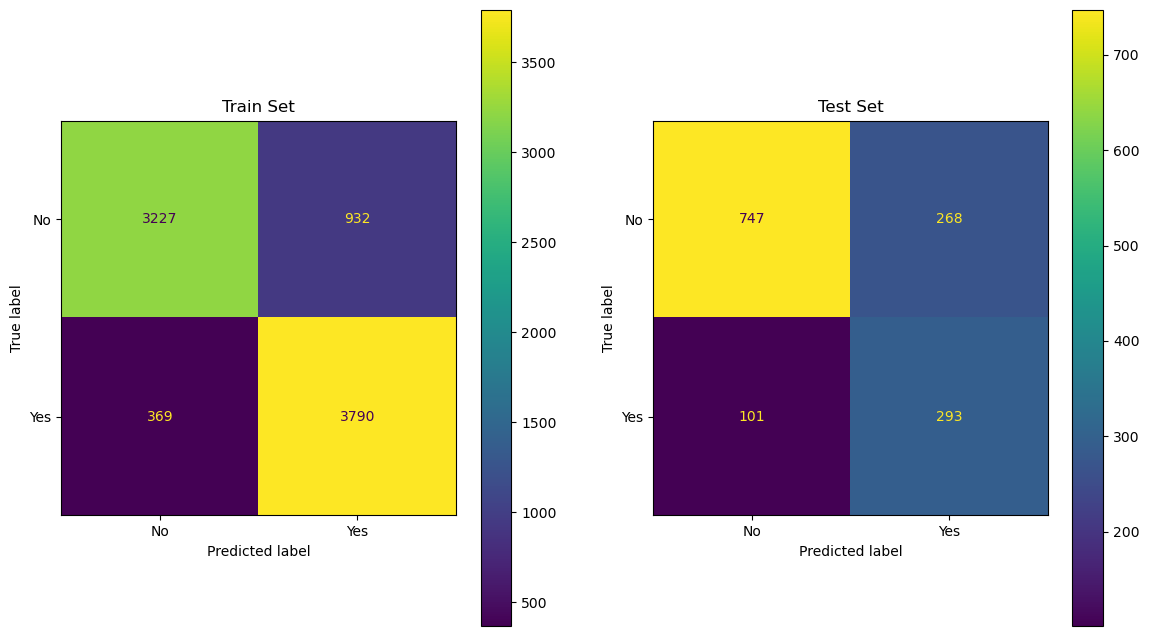

In [21]:
y_pred_train_dt = model.predict(X_sm)
y_pred_test_dt = model.predict(X_test_scaled)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm, y_pred_train_dt),
                                         precision_score(y_sm, y_pred_train_dt, pos_label='Yes'),
                                         recall_score(y_sm, y_pred_train_dt, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_dt, pos_label='Yes')]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")

plot_confusion_matrix(model,X_sm, y_sm,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

# KNN classifier

In [22]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_sm, y_sm) # train model

y_pred_train_dt = model.predict(X_sm)
y_pred_test_dt = model.predict(X_test_scaled)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm, y_pred_train_dt),
                                         precision_score(y_sm, y_pred_train_dt, pos_label='Yes'),
                                         recall_score(y_sm, y_pred_train_dt, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_dt, pos_label='Yes')]})

display(performance_df)

Error_metric     Train      Test
0     Accuracy  0.859461  0.735273
1    Precision  0.816737  0.519056
2       Recall  0.926906  0.725888

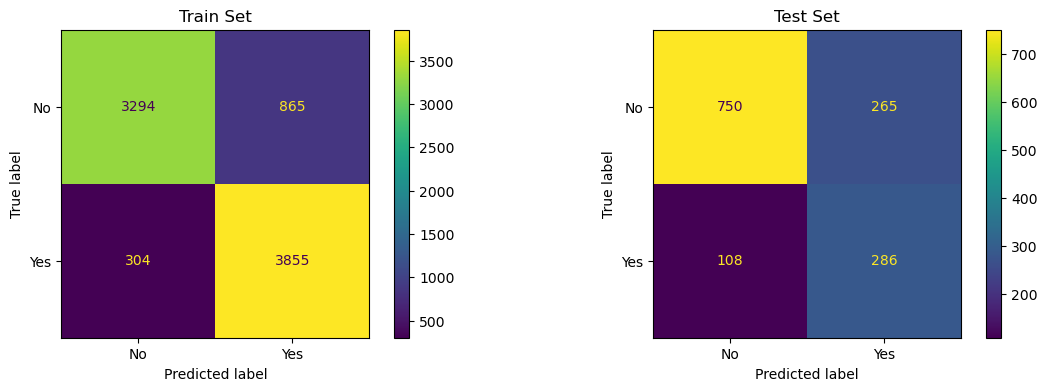

In [23]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_sm,y_sm,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

# Logistic Regression

Error_metric     Train      Test
0     Accuracy  0.775667  0.751597
1    Precision  0.755630  0.537931
2       Recall  0.814859  0.791878

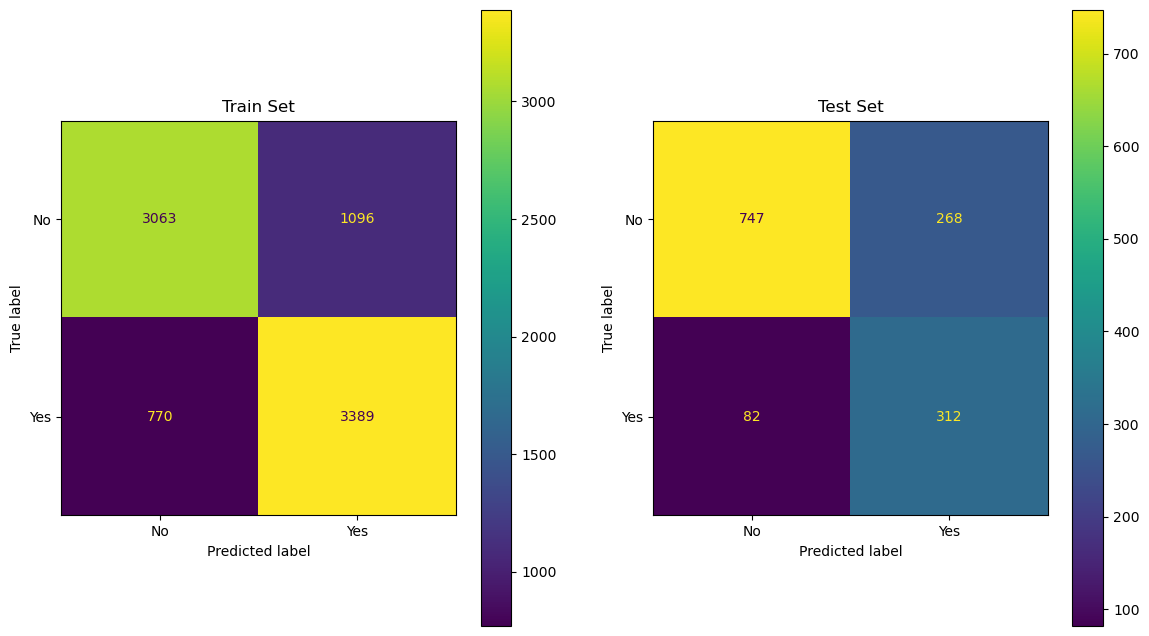

In [24]:
model = LogisticRegression() 

model.fit(X_sm, y_sm)


y_pred_train_dt = model.predict(X_sm)
y_pred_test_dt = model.predict(X_test_scaled)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm, y_pred_train_dt),
                                         precision_score(y_sm, y_pred_train_dt, pos_label='Yes'),
                                         recall_score(y_sm, y_pred_train_dt, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_dt, pos_label='Yes')]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")

plot_confusion_matrix(model,X_sm, y_sm,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")